https://blog.naver.com/jewdsa813/222179252786
01. g-h 필터

측정값(Measurement) : 측정한 값
예측값(Prediction) : 이론적으로 추측할 수 있는, 이론적으로 예상하는 값
추정값(Estimate) : 예측과 측정을 합해 제일 답일 가능성이 높은 값

추정(estimate)= f(측정(measurement), 예측(prediction))​

-======================================
하루에 1파운드씩 증가하는 160파운드였던 몸무게의 내일 예측값은 161일겁니다.
측정값은 오차(노이즈라고 하는)가 있을 수 있어 160.1일 수도, 158.8일 수도 있습니다.
추정값은 예측값에 오차가 포함된 측정값을 합해 우리가 선택할 제일 답일 가능성이 높은 값입니다. 
즉 추정값은 측정값과 예측값에 의해 변하는 값입니다.
-======================================


In [4]:
plot_errorbars??

Signature: plot_errorbars(bars, xlims, ylims=(-1, 1))
Source:   
def plot_errorbars(bars, xlims, ylims=(-1, 1)):
    """Plots a list of error bars with optional x and y limits.
    The list `bars` is a list of tuples (or any iterable) containing

    (mean value, error plus/minus, label)

    For example (160, 3, 'A') draws an error bar from 157 to 163, with the
    legend label 'A`)

    Parameters
    ----------

    bars : list
        list of tuples in form (mean, error +/-, label)

    x-lims : tuple
        tuple containing min and max values for x axis

    y-lims : tuple, optional
        tuple containing min and max values for y axis ( the default is (-1, 1))

    Example
    -------
    >>> plot_errorbars([(160, 3, 'A'), (170, 9, 'B')], xlims=(150, 180))
    """

    with figsize(y=2):
        i = 0.0
        for bar in bars:
            plt.errorbar([bar[0]], [i], xerr=[bar[1]], fmt='o', label=bar[2] , capthick=2, capsize=10)
            i += 0.2

        plt.ylim(*ylims)
  

In [5]:
plot_errorbars?

Signature: plot_errorbars(bars, xlims, ylims=(-1, 1))
Docstring:
Plots a list of error bars with optional x and y limits.
The list `bars` is a list of tuples (or any iterable) containing

(mean value, error plus/minus, label)

For example (160, 3, 'A') draws an error bar from 157 to 163, with the
legend label 'A`)

Parameters
----------

bars : list
    list of tuples in form (mean, error +/-, label)

x-lims : tuple
    tuple containing min and max values for x axis

y-lims : tuple, optional
    tuple containing min and max values for y axis ( the default is (-1, 1))

Example
-------
>>> plot_errorbars([(160, 3, 'A'), (170, 9, 'B')], xlims=(150, 180))
File:      c:\users\ta9\documents\python-kalman\kf_book\book_plots.py
Type:      function


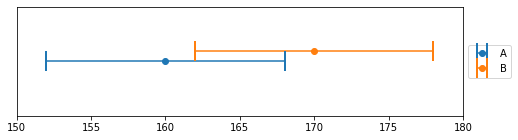

In [3]:
import kf_book.book_plots as book_plots
from kf_book.book_plots import plot_errorbars
# A 저울, B 저울
# 추론 가능 한 몸무게: 막대가 겹치는 부분
plot_errorbars([(160, 8, 'A'), (170, 8, 'B')], xlims=(150, 180))

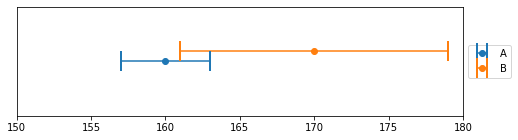

In [6]:
# A가 B보다 3배 더 정확하다면?
# 먼저 A=160, B=170일 때 A의 오차 ±3파운드, B의 오차는 A보다 세 배 크니까 ±9파운드
# 추론 가능 한 몸무게: 막대가 겹치는 부분
plot_errorbars([(160, 3, 'A'), (170, 9, 'B')], xlims=(150, 180))

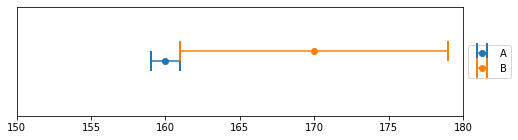

In [7]:
# 좀 더 극단적으로
# A 저울의 오차가 ±1파운드, A 저울의 오차가 ±1파운드 => 추정 몸무게 161파운드 한 값으로 수렴
# => 두 개의 덜 정확한 센서가 하나의 정확한 센서보다 낫다!!
plot_errorbars([(160, 1, 'A'), (170, 9, 'B')], xlims=(150, 180))

In [8]:
import numpy as np
# 하나의 체중계로 10000번 측정(랜덤값)
measurements = np.random.uniform(160, 170, size=10000)
mean = measurements.mean()
print(f'Average of measurements is {mean: .4f}')
# 결괏값은 165에 매우 가까움

Average of measurements is  164.9933


In [9]:
# 저울이 165파운드의 실제 무게에 대해서 160~165로 알려줄 가능성이 있다고 가정
# 가우시안... np.random.normal()> 165에 더 가까운 값이 많이나오고 멀어질수록 적게 나옴 > 실제 저울의 작동 방식과 유사한 편찻값 가질 것
mean = np.random.normal(165, 5, size=10000).mean()
print(f'Average of measurements is {mean: .4f}')
# 마찬가지로 결괏값 165에 매우 가까움

Average of measurements is  165.0550


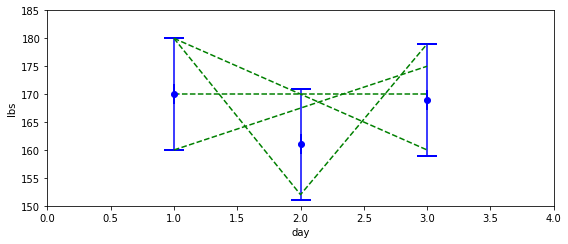

In [11]:
import kf_book.gh_internal as gh
# 하루에 한 번 몸무게를 측정해서 170, 161, 그리고 169파운드라는 값이 나왔다면? 몸무게의 변화가 있는것일지, 노이즈일지?
# 오차범위를 표시한 막대와 측정값을 표시 / 측정값으로 가능한 경우 녹색점선으로 표시
gh.plot_hypothesis1()

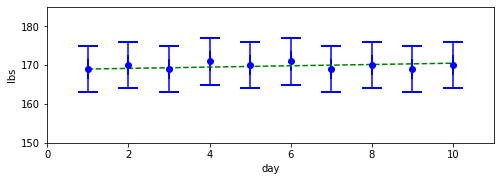

In [12]:
# 다른 저울을 사용하여 얻은 값
# 169, 170, 169, 171, 170, 171, 171, 169, 170, 171
# 오차를 포함한 실제 값 표시
gh.plot_hypothesis2()

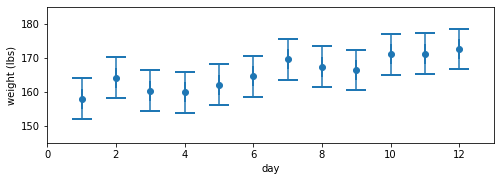

In [13]:
# 158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 169.6, 167.4, 171.0
# 체중이 증가하고 있다고 볼 수 있음
gh.plot_hypothesis3()

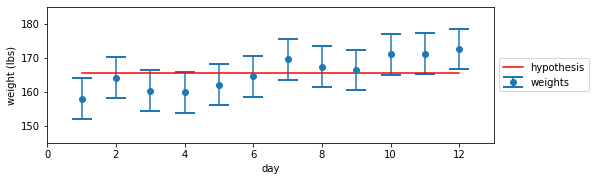

In [14]:
# 값에 오차가 있을 경우 제일 괜찮은 방법은 평균 구하는 것 -> 그래프에 평균 표시
gh.plot_hypothesis4()

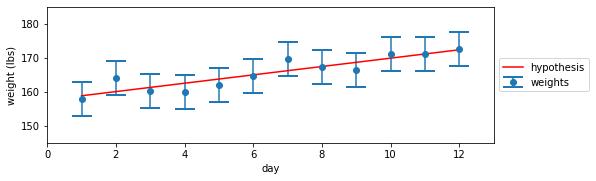

In [15]:
# numpy의 '최소 자승법' 이용하여 '주변'으로 보이는 치수를 통해 선 긋기 numpy.polyfit() 사용
# 위의 전체 값의 평균을 사용한 것 보다 정확해 보임, 가설이 각 측정값에 매우 근접
# 살이 쪘다, 좀 더 합리적
gh.plot_hypothesis5()

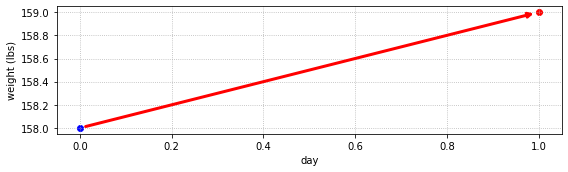

In [16]:
# 매일 1파운드 씩 살이 찌고있다고 추정?
gh.plot_estimate_chart_1()

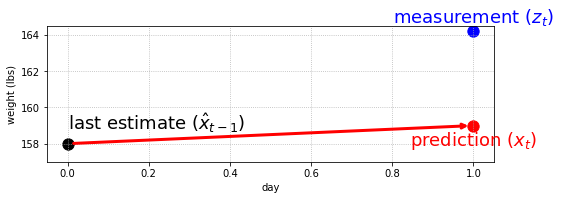

In [18]:
# 예측이 측정과 일치하지 않음!!
gh.plot_estimate_chart_2()

* 측정치에서만 추정값을 구하면 예측은 결과에 영향을 줄 수 없고, 예측값만 사용하여 추정값을 구하면 측정값이 무시됨
> =>예측값과 측정값을 혼합해야함!
+ 추정값은 예측값과 측정값 사이어야 한다

+ 추정값은 측정과 예측 사이의 중간이어야만 하나요? 그럴 때도 있지만 일반적으로 예측값에 비해 측정이 다소 정확하다는 것을 알고 있습니다. 



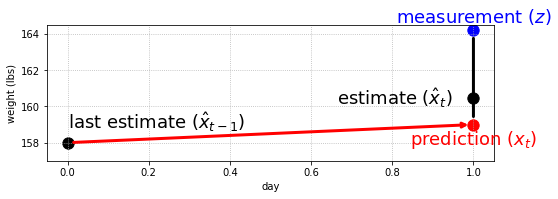

In [19]:
# 예측값을 확장하기 위해 무작위로 숫자를 하나 선택 => 4/10을 넣어서 계산
# 측정값이 주는 영향 4/10, 나머지는 예측값이 영향을 줌 => 측정값보다 예측값 정확도 높을거라 예상한 값
# 추정값 = 예측값 + 4/10(측정값 - 예측값) (6/10예측값, 4/10측정값)
# 잔차(residual): 측정값과 예측값 사이의 차이, 그래프 내 검은색 수직선, 
#       측정값과 필터를 거진 출력값 사이의 차이를 정확하게 계산하기 때문에 나중에 사용할 중요한 값이 됨, 잔차가 적으면 성능이 향상
gh.plot_estimate_chart_3()

In [20]:
from kf_book.book_plots import figsize
import matplotlib.pyplot as plt

# 매일 측정한 값
weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 
           169.6, 167.4, 166.4, 171.0, 171.2, 172.6]

time_stamp = 1.0 # day, 하루에 한번 측정
scale_factor = 4.0 / 10 # 측정값 영향

def predict_using_gain_guess(estimated_weight, gain_rate, do_print=False):
    # 필터링된 결과값 저장할 리스트
    estimates, predictions = [estimated_weight], []
    
    # 대부분 필터에서는 측정을 위해 'z'를 사용
    for z in weights:
        # 새로운 값 예측, 이전 추정값 사용
        predicted_weight = estimated_weight + gain_rate * time_stamp 
        
        # 필터 업데이트, 측정값과 예측값을 사용하여 값 업데이트
        estimated_weight = predicted_weight + scale_factor * (z - predicted_weight)
        
        # 저장 및 로그
        estimates.append(estimated_weight)
        predictions.append(predicted_weight)
        
        if do_print:
            gh.print_results(estimates, predicted_weight, estimated_weight)
            
    return estimates, predictions

# 초깃값 160파운드, 하루 1파운드씩 증가
initial_estimate = 160
estimates, predictions = predict_using_gain_guess(
    estimated_weight=initial_estimate, gain_rate=1, do_print=True)

previous estimate: 160.00, prediction: 161.00, estimate 159.80
previous estimate: 159.80, prediction: 160.80, estimate 162.16
previous estimate: 162.16, prediction: 163.16, estimate 162.02
previous estimate: 162.02, prediction: 163.02, estimate 161.77
previous estimate: 161.77, prediction: 162.77, estimate 162.50
previous estimate: 162.50, prediction: 163.50, estimate 163.94
previous estimate: 163.94, prediction: 164.94, estimate 166.80
previous estimate: 166.80, prediction: 167.80, estimate 167.64
previous estimate: 167.64, prediction: 168.64, estimate 167.75
previous estimate: 167.75, prediction: 168.75, estimate 169.65
previous estimate: 169.65, prediction: 170.65, estimate 170.87
previous estimate: 170.87, prediction: 171.87, estimate 172.16


[158.0,
 164.2,
 160.3,
 159.9,
 162.1,
 164.6,
 169.6,
 167.4,
 166.4,
 171.0,
 171.2,
 172.6]

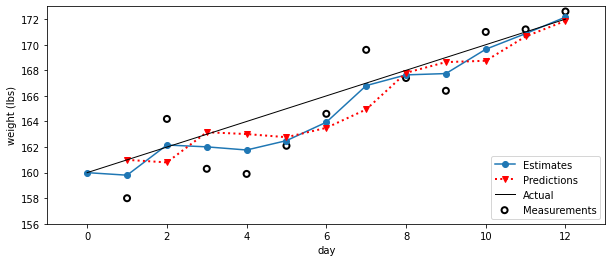

In [21]:
# plot results
book_plots.set_figsize(10)
gh.plot_gh_results(weights, estimates, predictions, [160, 172])
weights